In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [4]:
base = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/base_again/SalishSea_1h_20230301_20230301_grid_T.nc')
tands5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_5day/SalishSea_1h_20230301_20230305_grid_T.nc')

In [3]:
def plotTimeSeries(base, new, field, index1, index2, index3):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff_time1 = sum_diff.isel(deptht = index1)
    sum_diff_time1.plot(ax=axs[0],x = "time_counter", color = 'blue')
    axs[0].set_title(f'Sum of difference in {field} at depth {index1} m')
    axs[0].set_ylabel(f'{field}')

    sum_diff_time2 = sum_diff.isel(deptht = index2)
    sum_diff_time2.plot(ax=axs[1],x = "time_counter", color = 'blue')
    axs[1].set_title(f'Sum of difference in {field} at depth {index2} m')
    axs[1].set_ylabel(f'{field}')

    sum_diff_time3 = sum_diff.isel(deptht = index3)
    sum_diff_time3.plot(ax=axs[2],x = "time_counter", color = 'blue')
    axs[2].set_title(f'Sum of difference in {field} at depth {index3} m')
    axs[2].set_ylabel(f'{field}')

    plt.show()


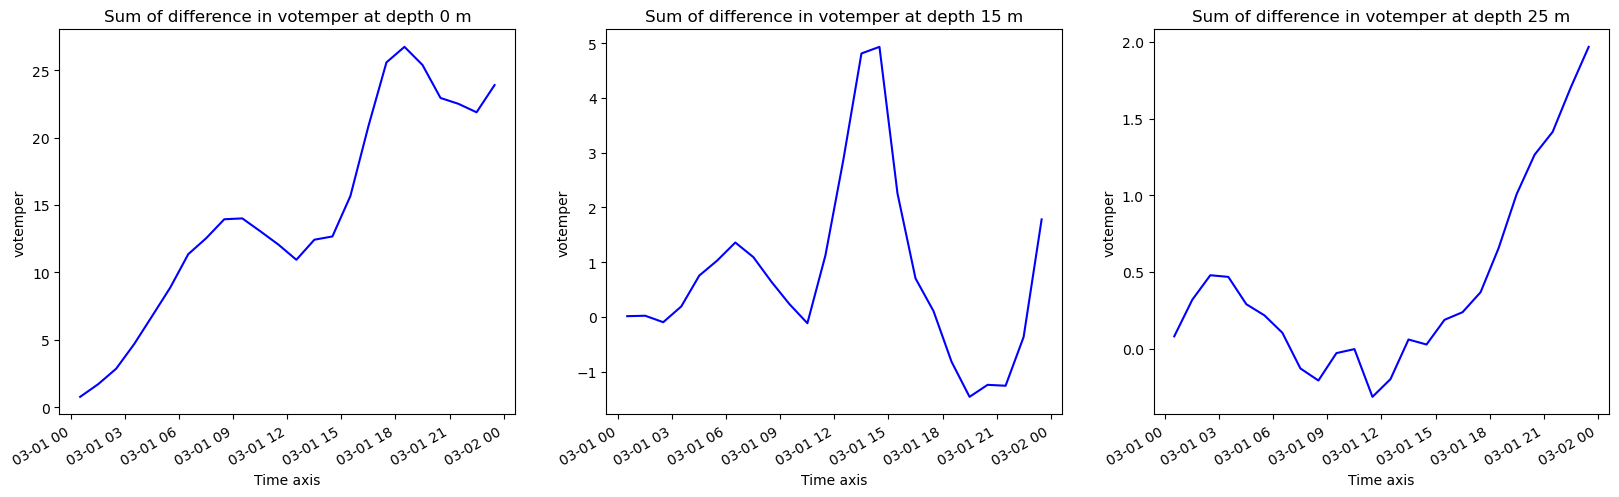

In [6]:
plotTimeSeries(base, tands5, 'votemper', 0, 15, 25)

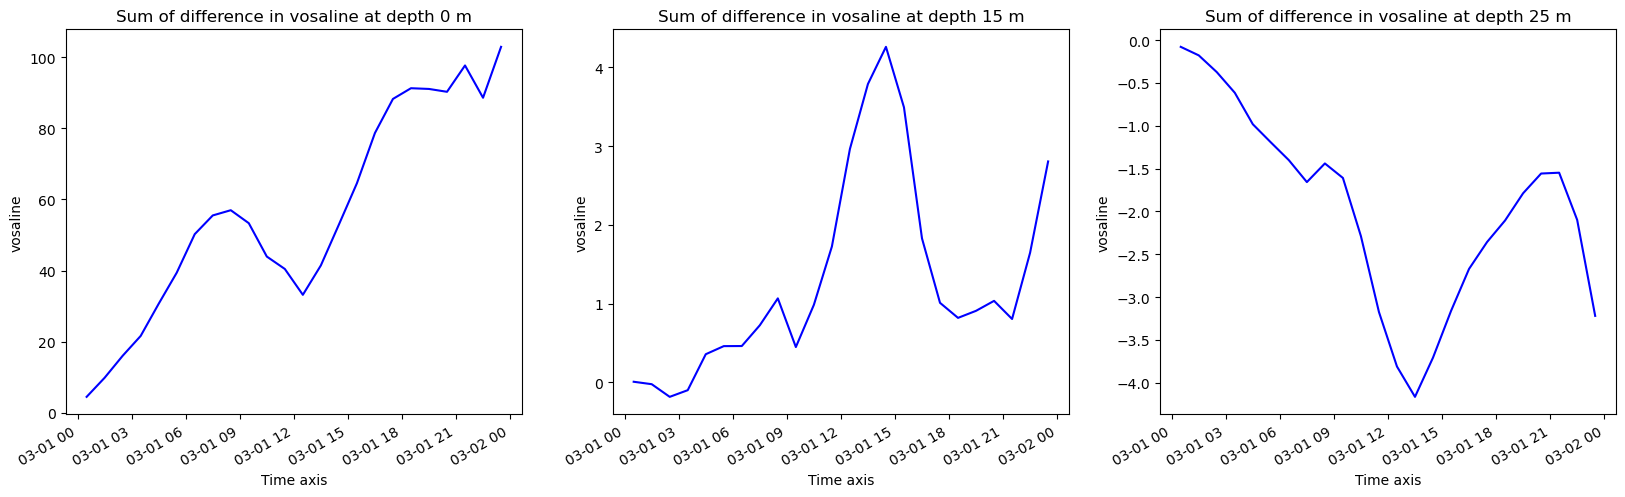

In [6]:
plotTimeSeries(base, tands5, 'vosaline', 0, 15, 25)

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('/home/sallen/MEOPAR/Metro_Data/UBC Output.xlsx-2023-7-31 15.19.6.csv',low_memory=False, parse_dates=[11])
data.keys()


Index(['LIMS Product', 'Lab Name', 'LIMS Project', 'Project Name', 'Job ID',
       'Lab ID', 'Sample Name', 'Sampling Point', 'Sampling Point Description',
       'Matrix', 'Sample Type', 'Sampled Date', 'Received Date',
       'Extraction Date', 'Analysis Date', 'Report Date', 'Test Type',
       'Method', 'Order Number', 'New Analysis', 'Class', 'Subclass',
       'Analyte', 'LIMS Analysis Code', 'Result', 'DL', 'Units', 'Qualifier',
       'Qualifier Description', 'Sampled By'],
      dtype='object')

In [6]:
data_time = data.set_index('Sampled Date')
data_time['LIMS Analysis Code'].unique()

array(['PH', 'TEMP', 'BOD_CALC', 'COD', 'SS', 'COND', 'VSS', 'NH3', 'CL',
       'HARDNESS', 'SO4', 'TKN', 'AL_DISSOLVED', 'BA_DISSOLVED',
       'B_DISSOLVED', 'CD_DISSOLVED', 'CR_DISSOLVED', 'CO_DISSOLVED',
       'CU_DISSOLVED', 'FE_DISSOLVED', 'PB_DISSOLVED', 'MN_DISSOLVED',
       'MO_DISSOLVED', 'NI_DISSOLVED', 'P_DISSOLVED', 'AG_DISSOLVED',
       'SN_DISSOLVED', 'ZN_DISSOLVED', 'AL_TOTAL', 'AS_TOTAL', 'BA_TOTAL',
       'B_TOTAL', 'CD_TOTAL', 'CA_TOTAL', 'CR_TOTAL', 'CO_TOTAL',
       'CU_TOTAL', 'FE_TOTAL', 'PB_TOTAL', 'MG_TOTAL', 'MN_TOTAL',
       'HG_TOTAL', 'MO_TOTAL', 'NI_TOTAL', 'P_TOTAL', 'SE_TOTAL',
       'AG_TOTAL', 'SN_TOTAL', 'ZN_TOTAL', 'DO', 'NO3', 'NO2', 'CN_TOTAL',
       'ALKALINITY', 'CA_DISSOLVED', 'MG_DISSOLVED', 'K_DISSOLVED',
       'NA_DISSOLVED', 'K_TOTAL', 'NA_TOTAL', 'DOC', 'TOC', 'TEMP_INSITU',
       'PH_INSITU', 'DO_INSITU', 'AS_DISSOLVED', 'SE_DISSOLVED', 'F',
       'PH_15_DEGREES', 'UN-IONIZED_NH3', 'SB_TOTAL', 'BE_TOTAL',
       'BI_TOTAL', 'LI

In [7]:
def plotTimeSeriesForAnalysisCode(field):
    data_F = data_time.loc[data_time['LIMS Analysis Code']== field]
    data_F = data_F[~data_F.index.isna()]
    data_F['Result'] = pd.to_numeric(data_F.Result, errors = 'coerce')
    data_F_Result = data_F.Result
    result = data_F_Result.groupby([data_F_Result.index.year, data_F_Result.index.month]).mean()
    plt.figure(figsize=(17, 6))
    result.plot()
    plt.xlabel("Time")
    plt.ylabel(f'{field}')
    plt.title(f'Time Series for {field}')

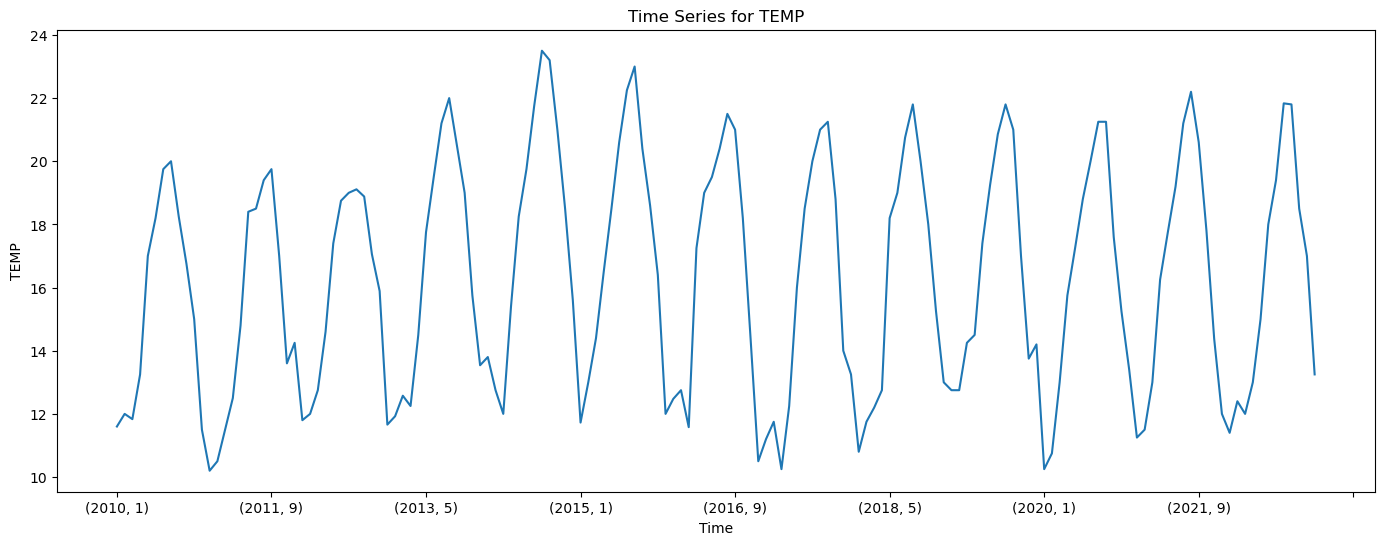

In [8]:
plotTimeSeriesForAnalysisCode('TEMP')

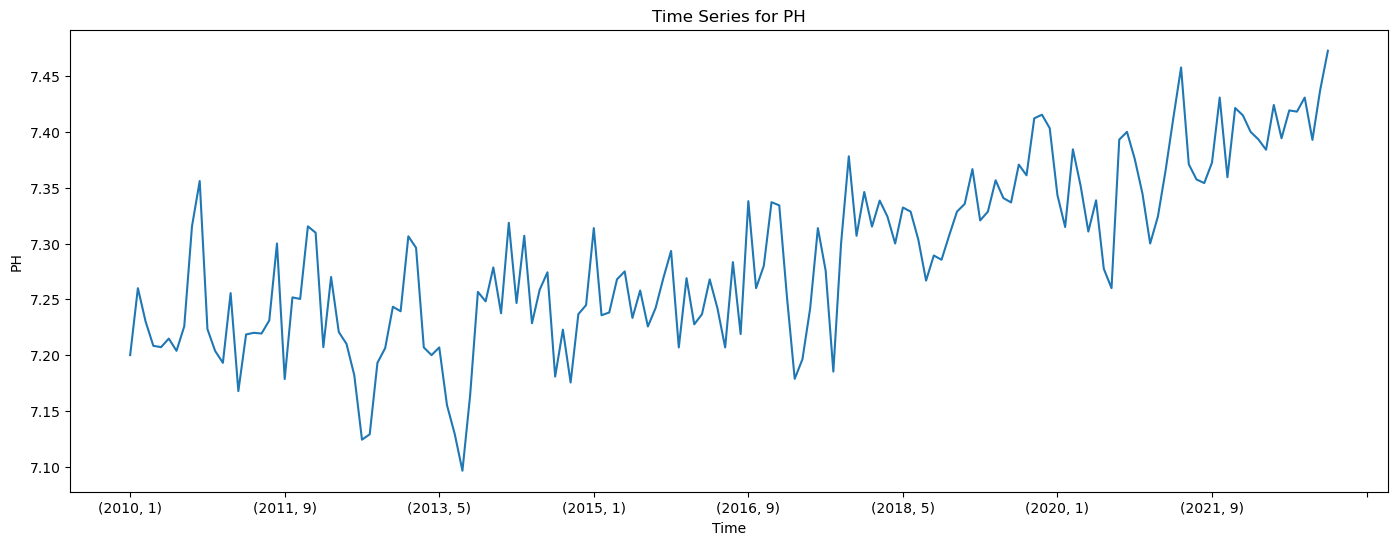

In [70]:
plotTimeSeriesForAnalysisCode('PH')

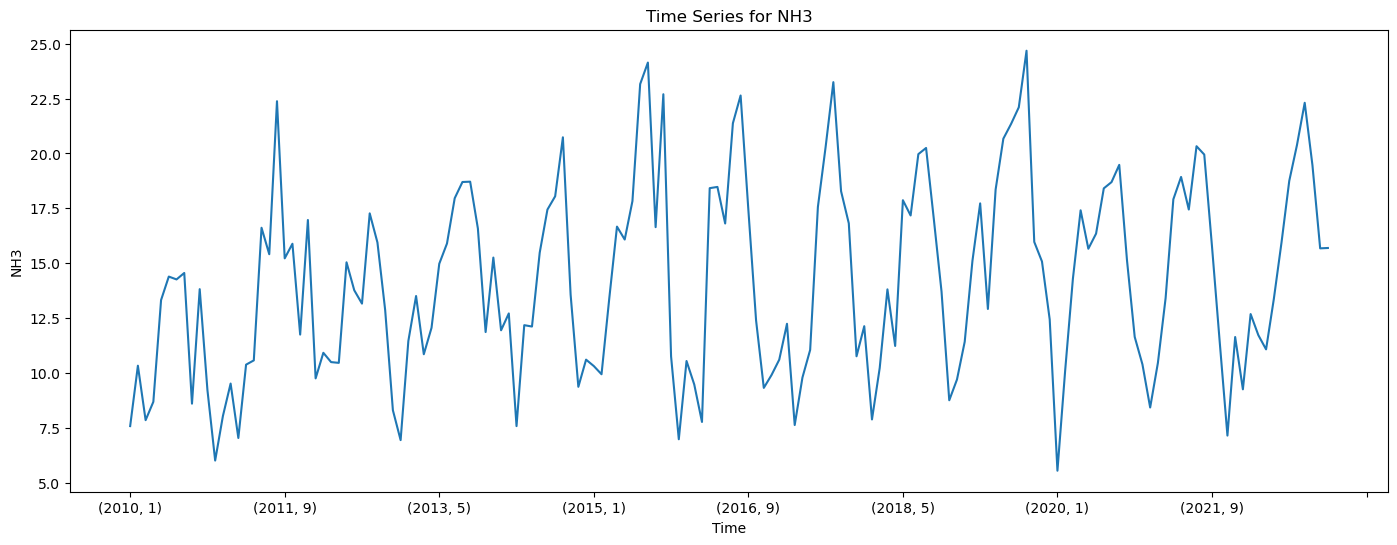

In [71]:
plotTimeSeriesForAnalysisCode('NH3')

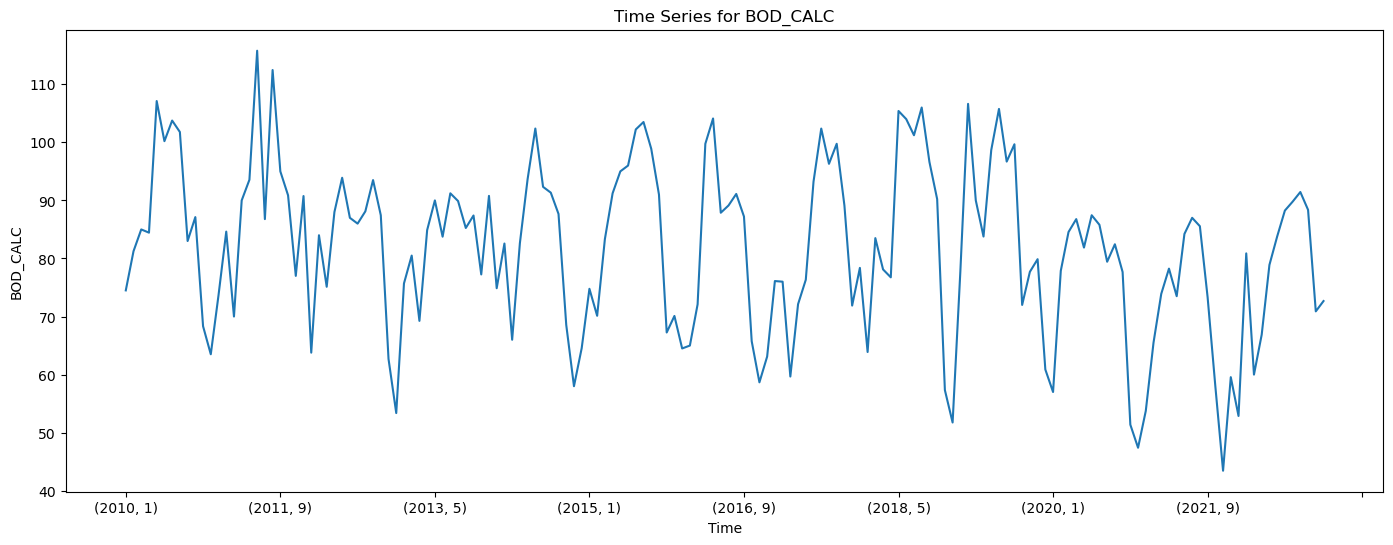

In [72]:
plotTimeSeriesForAnalysisCode('BOD_CALC')

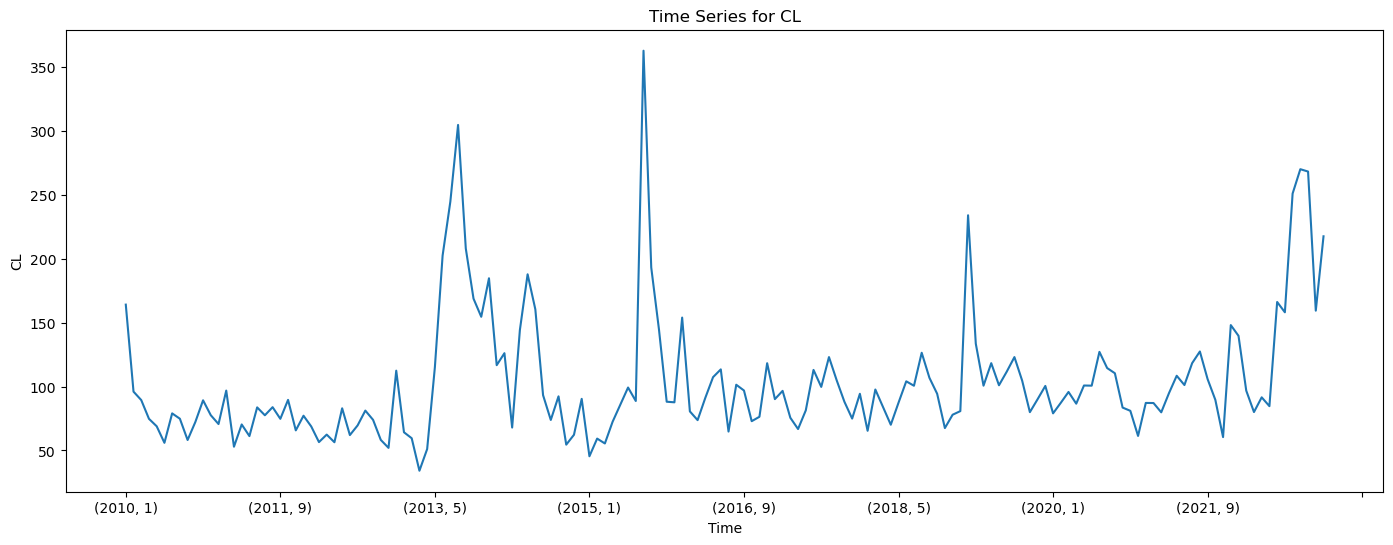

In [73]:
plotTimeSeriesForAnalysisCode('CL')

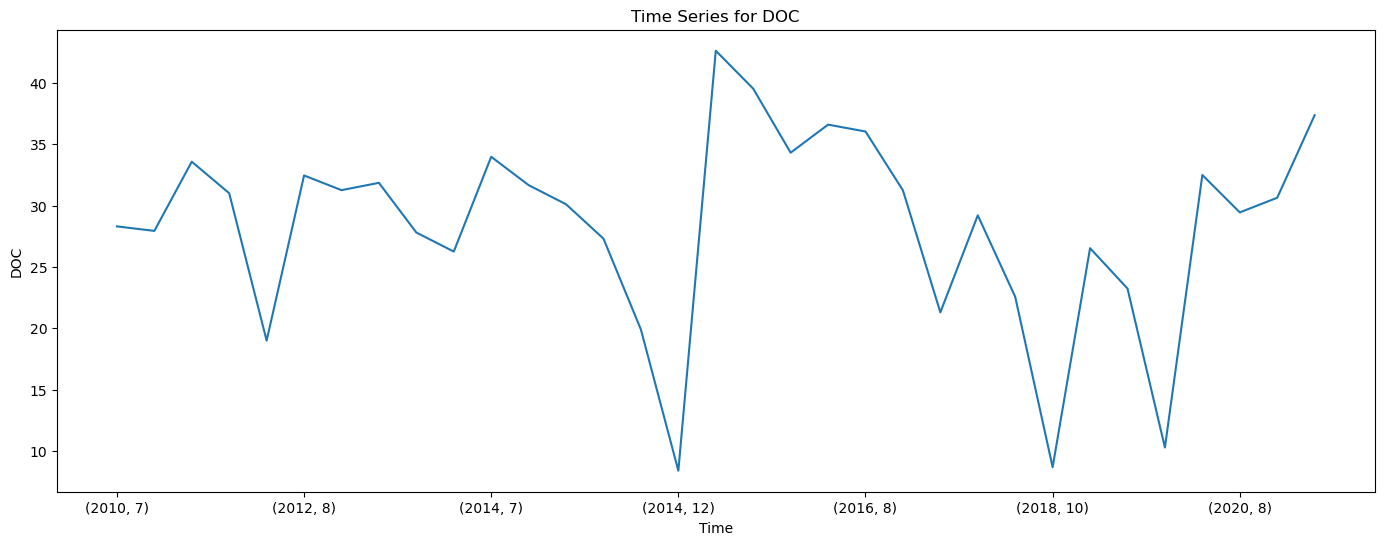

In [14]:
plotTimeSeriesForAnalysisCode('DOC')

In [6]:
data_time['Analyte'].unique()

array(['pH', 'Temperature', 'Biochemical Oxygen Demand - Calculated',
       'Chemical Oxygen Demand', 'Total Suspended Solids', 'Conductivity',
       'Volatile Suspended Solids', 'Nitrogen - Ammonia as N', 'Chloride',
       'Hardness as CaCO3', 'Sulphate', 'Nitrogen - Total Kjeldahl',
       'Aluminum Dissolved', 'Barium Dissolved', 'Boron Dissolved',
       'Cadmium Dissolved', 'Chromium Dissolved', 'Cobalt Dissolved',
       'Copper Dissolved', 'Iron Dissolved', 'Lead Dissolved',
       'Manganese Dissolved', 'Molybdenum Dissolved', 'Nickel Dissolved',
       'Phosphorus Dissolved', 'Silver Dissolved', 'Tin Dissolved',
       'Zinc Dissolved', 'Aluminum Total', 'Arsenic Total',
       'Barium Total', 'Boron Total', 'Cadmium Total', 'Calcium Total',
       'Chromium Total', 'Cobalt Total', 'Copper Total', 'Iron Total',
       'Lead Total', 'Magnesium Total', 'Manganese Total',
       'Mercury Total', 'Molybdenum Total', 'Nickel Total',
       'Phosphorus Total', 'Selenium Total', '

In [11]:
def plotTimeSeriesMonth(field):
    data_F = data_time.loc[data_time['LIMS Analysis Code']== field]
    data_F = data_F[~data_F.index.isna()]
    data_F['Result'] = pd.to_numeric(data_F.Result, errors = 'coerce')
    data_F_Result = data_F.Result
    result = data_F_Result.groupby(data_F_Result.index.month).mean()
    plt.figure(figsize=(8, 4))
    print(result.index)
    print(result.values)
    result.plot()
    plt.xlabel("Time (month)")
    plt.ylabel(f'{field}')
    plt.title(f'Time Series for {field}')
    

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Sampled Date')
[11.61864407 12.04259259 12.39833333 14.51851852 17.16666667 19.
 20.35483871 20.95945946 20.34285714 17.92105263 15.3030303  12.96666667]


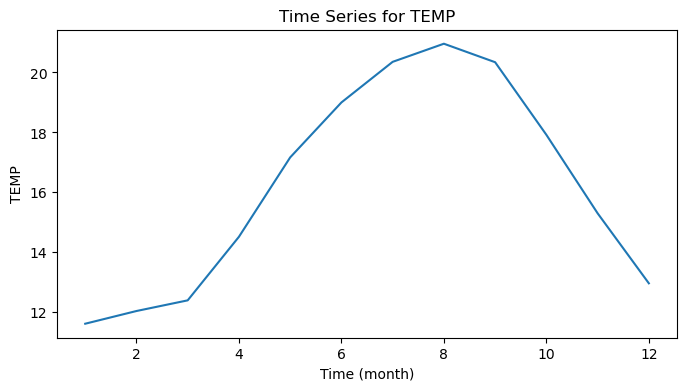

In [12]:
plotTimeSeriesMonth('TEMP')

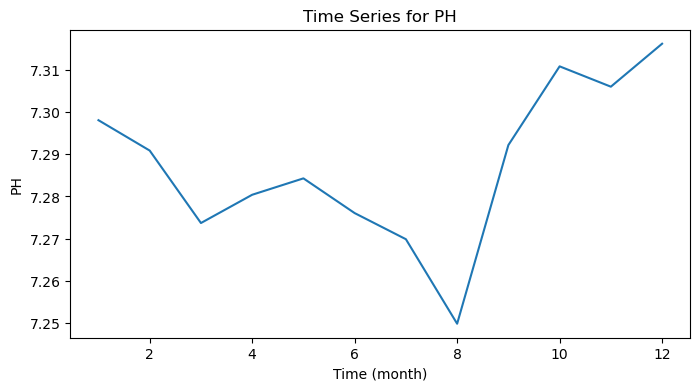

In [29]:
plotTimeSeriesMonth('PH')

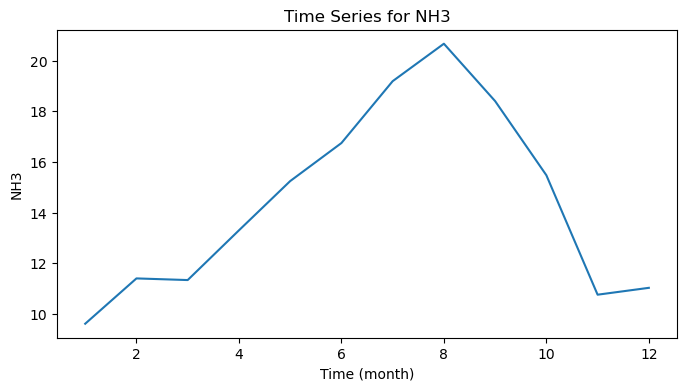

In [30]:
plotTimeSeriesMonth('NH3')

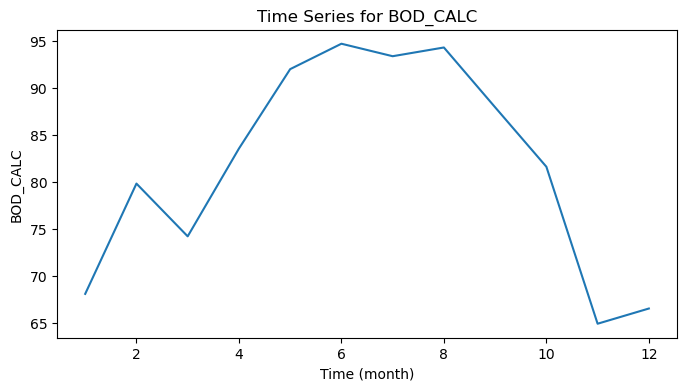

In [31]:
plotTimeSeriesMonth('BOD_CALC')

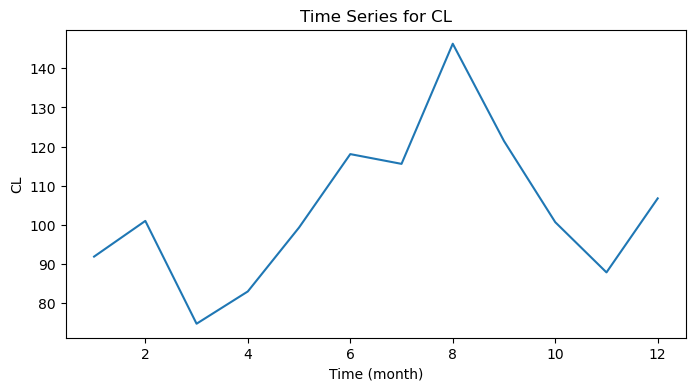

In [13]:
plotTimeSeriesMonth('CL')

Sampled Date
1     566.002994
2     580.114478
3     510.275148
4     552.184211
5     597.906542
6     654.829721
7     684.026178
8     790.605505
9     687.485981
10    633.076923
11    538.068323
12    613.543624
Name: Result, dtype: float64


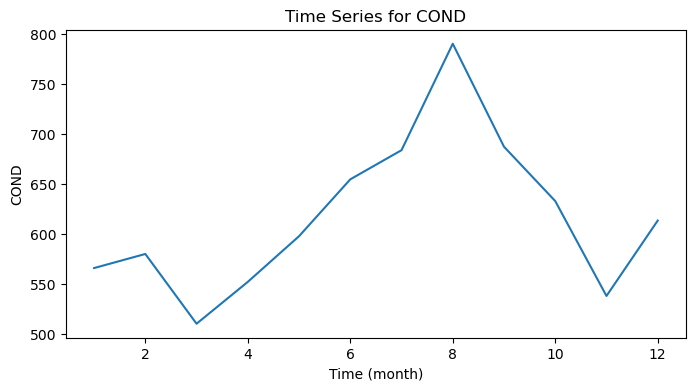

In [9]:
plotTimeSeriesMonth('COND')

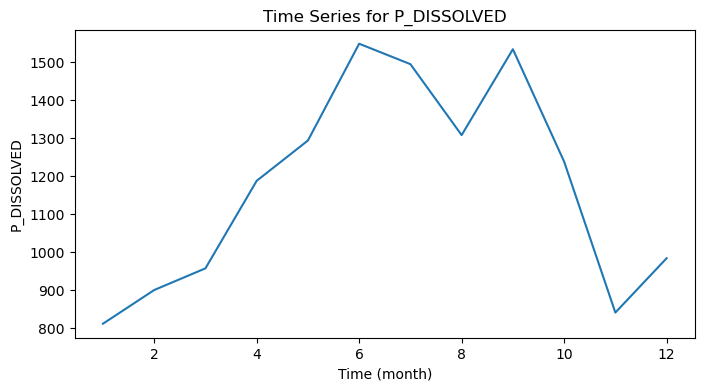

In [22]:
plotTimeSeriesMonth('P_DISSOLVED')

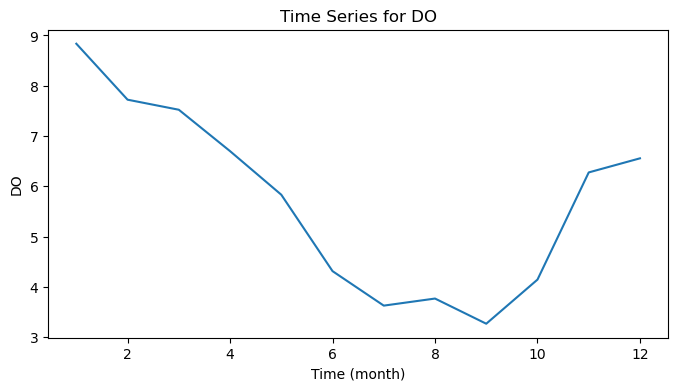

In [24]:
plotTimeSeriesMonth('DO')

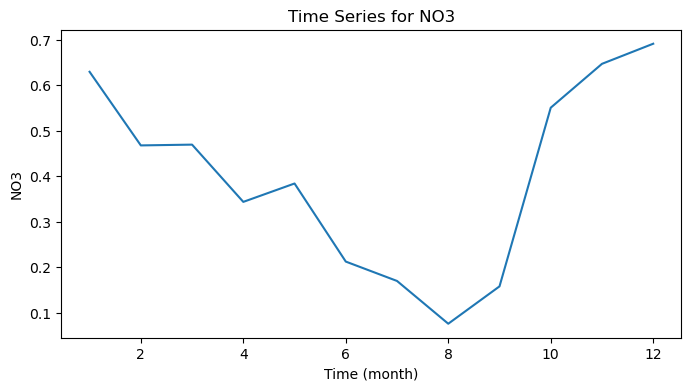

In [25]:
plotTimeSeriesMonth('NO3')

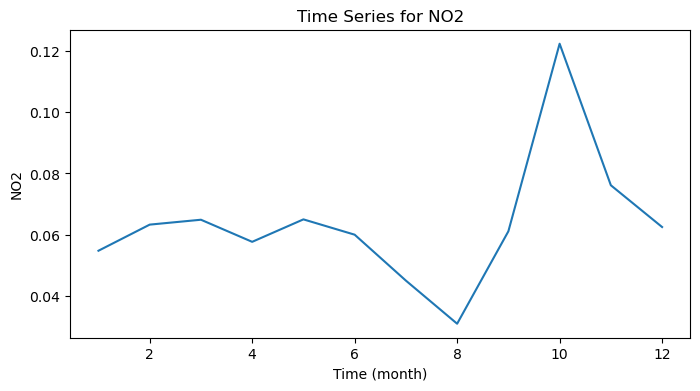

In [12]:
plotTimeSeriesMonth('NO2')

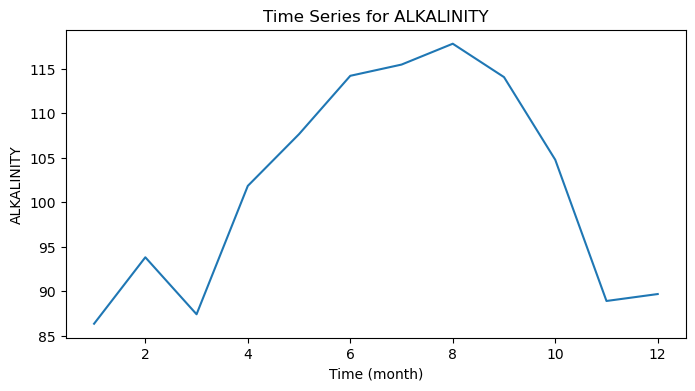

In [27]:
plotTimeSeriesMonth('ALKALINITY')

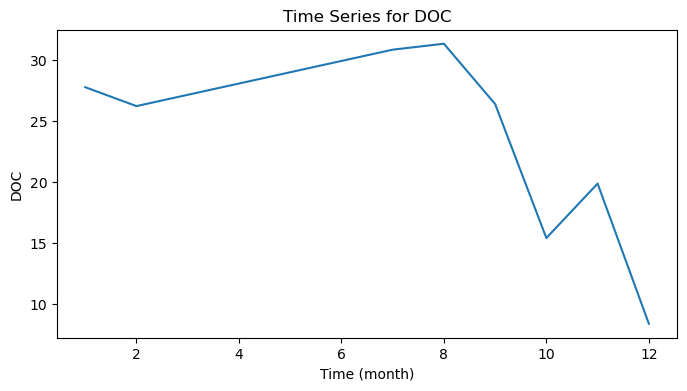

In [28]:
plotTimeSeriesMonth('DOC')

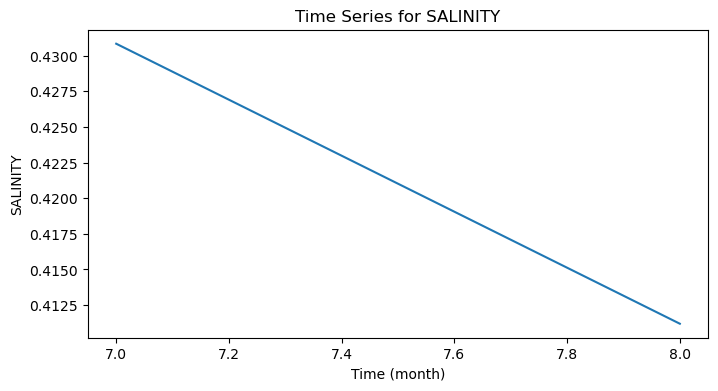

In [29]:
plotTimeSeriesMonth('SALINITY')

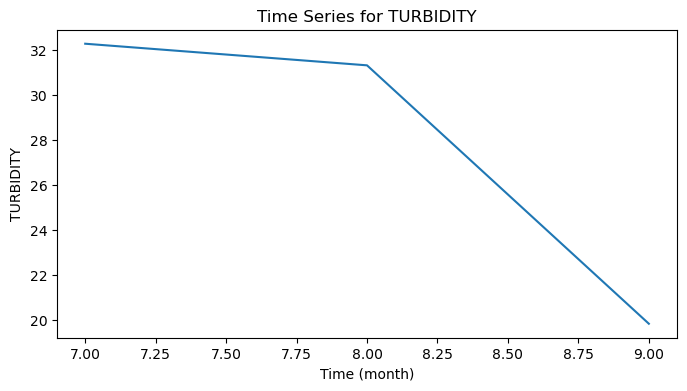

In [31]:
plotTimeSeriesMonth('TURBIDITY')

Sampled Date
1     50.412698
2     51.013944
3     50.614943
4     51.498990
5     54.044807
6     53.694501
7     53.267636
8     52.459597
9     50.714911
10    49.642778
11    45.850325
12    47.811947
Name: Result, dtype: float64


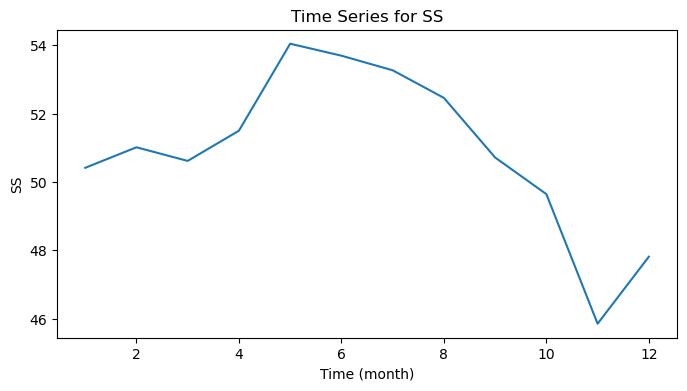

In [9]:
plotTimeSeriesMonth('SS')

In [6]:
def plotTimeSeriesExtend(field):
    data_F = data_time.loc[data_time['LIMS Analysis Code']== field]
    data_F = data_F[~data_F.index.isna()]
    data_F['Result'] = pd.to_numeric(data_F.Result, errors = 'coerce')
    print(data_F.Result)
    plt.scatter(data_F.Result.index, data_F.Result)

Sampled Date
2010-07-27 13:52:00    27.3
2010-07-27 14:15:00    33.5
2010-07-27 14:35:00    34.3
2010-07-28 10:38:00    23.2
2010-07-28 11:18:00    29.1
                       ... 
2021-08-05 12:00:00    44.1
2021-08-05 12:30:00    50.4
2021-08-12 09:15:00    26.2
2021-08-12 09:45:00    30.2
2021-08-12 10:15:00    32.1
Name: Result, Length: 201, dtype: float64


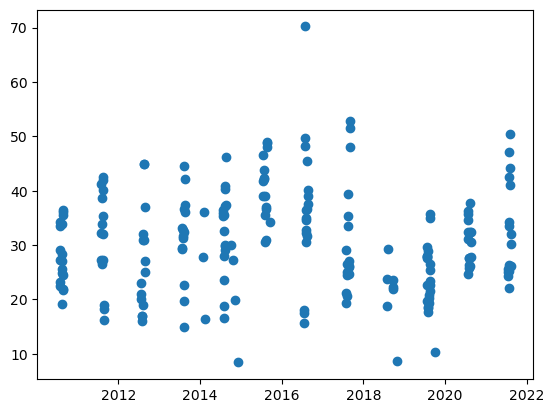

In [9]:
plotTimeSeriesExtend('DOC')

Sampled Date
2016-07-19 12:05:00    0.486
2016-07-19 12:50:00    0.476
2016-07-19 13:45:00    0.454
2016-07-26 12:30:00    0.369
2016-07-26 13:22:00    0.368
                       ...  
2021-08-05 12:00:00    0.480
2021-08-05 12:30:00    0.470
2021-08-12 09:15:00    0.400
2021-08-12 09:45:00    0.390
2021-08-12 10:15:00    0.390
Name: Result, Length: 131, dtype: float64


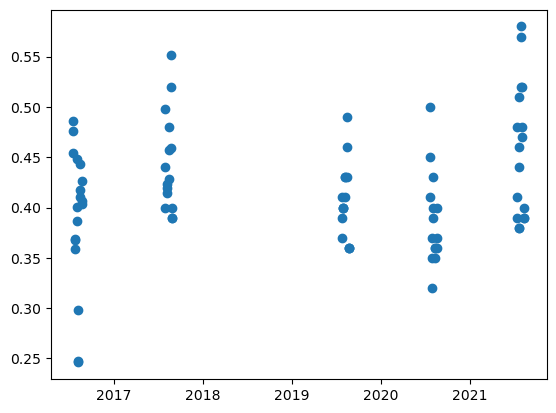

In [10]:
plotTimeSeriesExtend('SALINITY')

Sampled Date
2017-08-01 07:50:00    40.5
2017-08-01 08:55:00    34.8
2017-08-01 09:45:00    31.8
2017-08-08 07:45:00    27.7
2017-08-08 08:45:00    26.0
                       ... 
2021-08-05 12:00:00    29.2
2021-08-05 12:30:00    25.8
2021-08-12 09:15:00    15.6
2021-08-12 09:45:00    17.8
2021-08-12 10:15:00    19.5
Name: Result, Length: 72, dtype: float64


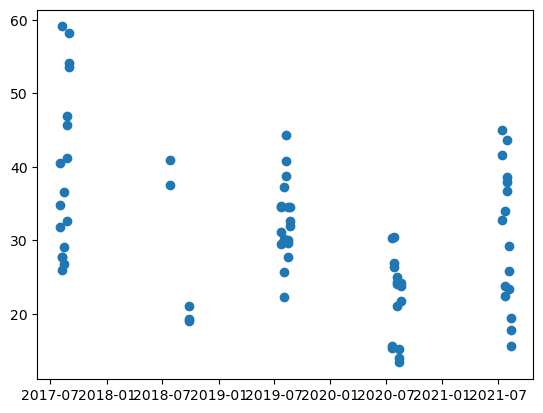

In [11]:
plotTimeSeriesExtend('TURBIDITY')

Sampled Date
2010-01-03     466
2010-01-04     377
2010-01-05     516
2010-01-06     574
2010-01-07     503
              ... 
2022-12-20    1380
2022-12-21    1370
2022-12-22    1390
2022-12-27    1010
2022-12-28     788
Name: Result, Length: 4001, dtype: int64


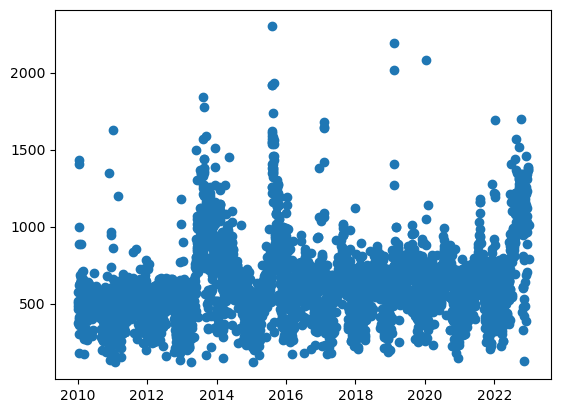

In [11]:
plotTimeSeriesExtend('COND')

Sampled Date
2010-01-01 00:00:00    49.0
2010-01-02 00:00:00    39.0
2010-01-03 00:00:00    42.0
2010-01-04 00:00:00    61.0
2010-01-05 00:00:00    47.0
                       ... 
2022-12-27 00:00:00    38.0
2022-12-28 00:00:00    35.0
2022-12-28 08:00:00    12.0
2022-12-30 00:00:00    52.0
2022-12-31 00:00:00    42.0
Name: Result, Length: 6500, dtype: float64


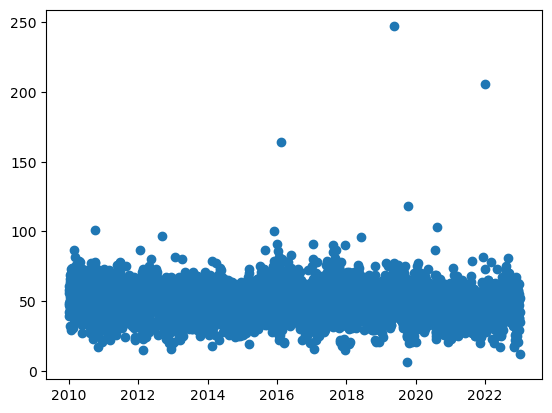

In [7]:
plotTimeSeriesExtend('SS')

Sampled Date
2019-08-28 08:25:00    0.99
Name: Result, dtype: float64


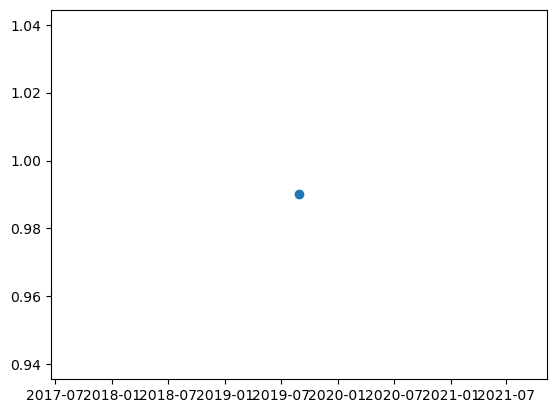

In [10]:
plotTimeSeriesExtend('DENSITY')